In [1]:
import os
import matplotlib as mpl
import tarfile
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

import mxnet as mx
from mxnet import gluon
from mxnet import ndarray as nd
from mxnet.gluon import nn, utils
from mxnet import autograd
import numpy as np

In [2]:
import brine
anime_train = brine.load_dataset('jayleicn/anime-faces')

In [3]:
type(anime_train.columns)

brine.dataset.Column

In [4]:
len(anime_train)

115085

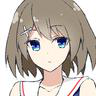

In [5]:
anime_train.load_image(anime_train[0].image)

In [6]:
_, training_fold = anime_train.create_folds([80000],shuffle=True)
print(len(training_fold))

35085


In [7]:
target_wd = 64
target_ht = 64
img_list = []

def transform(data, target_wd, target_ht):
    # resize to target_wd * target_ht
    data = mx.image.imresize(data, target_wd, target_ht)
    # transpose from (target_wd, target_ht, 3) 
    # to (3, target_wd, target_ht)
    data = nd.transpose(data, (2,0,1))
    # normalize to [-1, 1]
    data = data.astype(np.float32)/127.5 - 1
    return data.reshape((1,) + data.shape)

def getImageList(base_path,training_folder):
    img_list = []
    for train in training_folder:
        fname = base_path + train.image
        img_arr = mx.image.imread(fname)
        img_arr = transform(img_arr, target_wd, target_ht)
        img_list.append(img_arr)
    return img_list

base_path = 'brine_datasets/jayleicn/anime-faces/images/'
img_list = getImageList('brine_datasets/jayleicn/anime-faces/images/',training_fold)


In [8]:
batch_size = 64
train_data = mx.io.NDArrayIter(data=nd.concatenate(img_list), batch_size=batch_size)

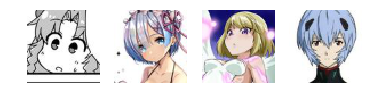

In [14]:
def visualize(img_arr):
    plt.imshow(((img_arr.asnumpy().transpose(1, 2, 0) + 1.0) * 127.5).astype(np.uint8))
    plt.axis('off')

for i in range(4):
    plt.subplot(1,4,i+1)
    visualize(img_list[i + 10][0])
plt.show()

In [10]:
#img_arr = mx.image.imread('lfw_dataset/lfw-deepfunneled/Miguel_Aldana_Ibarra/Miguel_Aldana_Ibarra_0001.jpg')

In [54]:
#example of upsampling

#produce random vector of shape (1 X 100 X 1 X 1). Order is (Batchsize, channels, X dimenions, Y dimension)
random_z = mx.nd.random_normal(0, 1, shape=(1, latent_z_size, 1, 1), ctx=ctx)
netTest = nn.Sequential()

with netTest.name_scope():
    # input is Z, going into a convolution. (100X1X1). Ignored the batch size
    # The upsamples is applied only for X and Y dimensions
    netTest.add(nn.Conv2DTranspose(48, 4, 1, 0, use_bias=False)) # 48 filters, upsamples by 4, with 1 stride, 0 padding
    # The output from previous convolution is of dimension (48 X 4 X 4) . Ignored the batch size
    netTest.add(nn.Conv2DTranspose(48, 4, 2, 1, use_bias=False)) # 48 filters, upsamples by 4, with 2 stride, 1 padding
    netTest.add(nn.Conv2DTranspose(48, 4, 2, 1, use_bias=False))
   
netTest.initialize(mx.init.Normal(0.02), ctx=ctx)
abc = netTest(latent_z)
print("The input shape is", latent_z.shape)
print("The ouput shape is", abc.shape)

The input shape is (1, 100, 1, 1)
The ouput shape is (1, 48, 16, 16)


In [15]:
epochs = 5 # Set low by default for tests, set higher when you actually run this code.
batch_size = 64
latent_z_size = 100

use_gpu = True
ctx = mx.gpu() if use_gpu else mx.cpu()

lr = 0.001
beta1 = 0.5

In [12]:
# class RNNModel(gluon.Block):
#     """A model with an encoder, recurrent layer, and a decoder."""

#     def __init__(self, nc, vocab_size, num_embed, num_hidden,
#                  num_layers, dropout=0.5, **kwargs):
#         super(RNNModel, self).__init__(**kwargs)
#         with self.name_scope():
#             # input is Z, going into a convolution
#             self.add(nn.Conv2DTranspose(ngf * 8, 4, 1, 0, use_bias=False))
#             self.add(nn.BatchNorm())
#             self.add(nn.Activation('relu'))
#             # state size. (ngf*8) x 4 x 4
#             self.add(nn.Conv2DTranspose(ngf * 4, 4, 2, 1, use_bias=False))
#             self.add(nn.BatchNorm())
#             self.add(nn.Activation('relu'))
#             # state size. (ngf*8) x 8 x 8
#             self.add(nn.Conv2DTranspose(ngf * 2, 4, 2, 1, use_bias=False))
#             self.add(nn.BatchNorm())
#             self.add(nn.Activation('relu'))
#             # state size. (ngf*8) x 16 x 16
#             self.add(nn.Conv2DTranspose(ngf, 4, 2, 1, use_bias=False))
#             self.add(nn.BatchNorm())
#             self.add(nn.Activation('relu'))
#             # state size. (ngf*8) x 32 x 32
#             self.add(nn.Conv2DTranspose(nc, 4, 2, 1, use_bias=False))
#             self.add(nn.Activation('tanh'))
#             # state size. (nc) x 64 x 64

            
#     #define the forward pass of the neural network
#     def forward(self, inputs):
        
#         return decoded, hidden
#     #Initial state of netork
    

In [16]:
# build the generator
nc = 3
ngf = 64
netG = nn.Sequential()
with netG.name_scope():
    # input is Z, going into a convolution
    netG.add(nn.Conv2DTranspose(ngf * 8, 4, 1, 0, use_bias=False))
    netG.add(nn.BatchNorm())
    netG.add(nn.Activation('relu'))
    # state size. (ngf*8) x 4 x 4
    netG.add(nn.Conv2DTranspose(ngf * 4, 4, 2, 1, use_bias=False))
    netG.add(nn.BatchNorm())
    netG.add(nn.Activation('relu'))
    # state size. (ngf*8) x 8 x 8
    netG.add(nn.Conv2DTranspose(ngf * 2, 4, 2, 1, use_bias=False))
    netG.add(nn.BatchNorm())
    netG.add(nn.Activation('relu'))
    # state size. (ngf*8) x 16 x 16
    netG.add(nn.Conv2DTranspose(ngf, 4, 2, 1, use_bias=False))
    netG.add(nn.BatchNorm())
    netG.add(nn.Activation('relu'))
    # state size. (ngf*8) x 32 x 32
    netG.add(nn.Conv2DTranspose(nc, 4, 2, 1, use_bias=False))
    netG.add(nn.Activation('tanh'))
    # state size. (nc) x 64 x 64

# build the discriminator
ndf = 64
netD = nn.Sequential()
with netD.name_scope():
    # input is (nc) x 64 x 64
    netD.add(nn.Conv2D(ndf, 4, 2, 1, use_bias=False))
    netD.add(nn.LeakyReLU(0.2))
    # state size. (ndf) x 32 x 32
    netD.add(nn.Conv2D(ndf * 2, 4, 2, 1, use_bias=False))
    netD.add(nn.BatchNorm())
    netD.add(nn.LeakyReLU(0.2))
    # state size. (ndf) x 16 x 16
    netD.add(nn.Conv2D(ndf * 4, 4, 2, 1, use_bias=False))
    netD.add(nn.BatchNorm())
    netD.add(nn.LeakyReLU(0.2))
    # state size. (ndf) x 8 x 8
    netD.add(nn.Conv2D(ndf * 8, 4, 2, 1, use_bias=False))
    netD.add(nn.BatchNorm())
    netD.add(nn.LeakyReLU(0.2))
    # state size. (ndf) x 4 x 4
    netD.add(nn.Conv2D(1, 4, 1, 0, use_bias=False))

In [19]:
train_data.reset()
netD.initialize(mx.init.Normal(0.02), ctx=ctx)
for batch in train_data:
    sample = batch.data[0].as_in_context(ctx)
    #print(sample.shape)
    break
print(sample.shape)
    
out = netD(sample)
print(out.shape)

(64, 3, 64, 64)
(64, 1, 1, 1)


The input shape is (1, 100, 1, 1)
The ouput shape is (1, 48, 8, 8)


In [43]:
# loss
loss = gluon.loss.SigmoidBinaryCrossEntropyLoss()

# initialize the generator and the discriminator
netG.initialize(mx.init.Normal(0.02), ctx=ctx)
netD.initialize(mx.init.Normal(0.02), ctx=ctx)

# trainer for the generator and the discriminator
trainerG = gluon.Trainer(netG.collect_params(), 'adam', {'learning_rate': lr, 'beta1': beta1})
trainerD = gluon.Trainer(netD.collect_params(), 'adam', {'learning_rate': lr, 'beta1': beta1})

In [44]:
from datetime import datetime
import time
import logging

#initialise some labels of calculating the loss
real_label = nd.ones((batch_size,), ctx=ctx)
fake_label = nd.zeros((batch_size,),ctx=ctx)

def facc(label, pred):
    pred = pred.ravel()
    label = label.ravel()
    return ((pred > 0.5) == label).mean()
metric = mx.metric.CustomMetric(facc)

stamp =  datetime.now().strftime('%Y_%m_%d-%H_%M')
logging.basicConfig(level=logging.DEBUG)

for epoch in range(epochs):
    tic = time.time()
    btic = time.time()
    train_data.reset()
    iter = 0
    for batch in train_data:
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        data = batch.data[0].as_in_context(ctx)
        latent_z = mx.nd.random_normal(0, 1, shape=(batch_size, latent_z_size, 1, 1), ctx=ctx)

        with autograd.record():
            # train with real image
            output = netD(data).reshape((-1, 1))
            #The loss is a real valued number
            errD_real = loss(output, real_label)
            
            metric.update([real_label,], [output,])

            # train with fake image
            fake = netG(latent_z)
            output = netD(fake.detach()).reshape((-1, 1))
            errD_fake = loss(output, fake_label)
            errD = errD_real + errD_fake
            errD.backward()
            metric.update([fake_label,], [output,])

        trainerD.step(batch.data[0].shape[0])

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        with autograd.record():
            fake = netG(latent_z)
            output = netD(fake).reshape((-1, 1))
            errG = loss(output, real_label)
            errG.backward()

        trainerG.step(batch.data[0].shape[0])

        # Print log infomation every ten batches
        if iter % 32 == 0:
            name, acc = metric.get()
            logging.info('speed: {} samples/s'.format(batch_size / (time.time() - btic)))
            logging.info('discriminator loss = %f, generator loss = %f, binary training acc = %f at iter %d epoch %d' 
                     %(nd.mean(errD).asscalar(), 
                       nd.mean(errG).asscalar(), acc, iter, epoch))
        iter = iter + 1
        btic = time.time()

    name, acc = metric.get()
    metric.reset()
    # logging.info('\nbinary training acc at epoch %d: %s=%f' % (epoch, name, acc))
    # logging.info('time: %f' % (time.time() - tic))

    # Visualize one generated image for each epoch
    # fake_img = fake[0]
    # visualize(fake_img)
    # plt.show()

INFO:root:speed: 264.3595602993053 samples/s
INFO:root:discriminator loss = 1.840440, generator loss = 9.701143, binary training acc = 0.515625 at iter 0 epoch 0
INFO:root:speed: 304.23648428866915 samples/s
INFO:root:discriminator loss = 0.912885, generator loss = 5.226696, binary training acc = 0.685133 at iter 32 epoch 0
INFO:root:speed: 305.5559165182154 samples/s
INFO:root:discriminator loss = 1.225941, generator loss = 6.371082, binary training acc = 0.721875 at iter 64 epoch 0
INFO:root:speed: 305.11136798913384 samples/s
INFO:root:discriminator loss = 1.366206, generator loss = 6.910207, binary training acc = 0.734214 at iter 96 epoch 0
INFO:root:speed: 303.3319803470455 samples/s
INFO:root:discriminator loss = 0.832580, generator loss = 3.865159, binary training acc = 0.733043 at iter 128 epoch 0
INFO:root:speed: 304.7445501751709 samples/s
INFO:root:discriminator loss = 1.007960, generator loss = 1.998574, binary training acc = 0.719769 at iter 160 epoch 0
INFO:root:speed: 30

INFO:root:speed: 303.48390131066475 samples/s
INFO:root:discriminator loss = 1.048251, generator loss = 4.089415, binary training acc = 0.715287 at iter 448 epoch 2
INFO:root:speed: 300.6982761421161 samples/s
INFO:root:discriminator loss = 1.358295, generator loss = 1.826319, binary training acc = 0.713796 at iter 480 epoch 2
INFO:root:speed: 303.37620348384485 samples/s
INFO:root:discriminator loss = 1.047730, generator loss = 4.423983, binary training acc = 0.713268 at iter 512 epoch 2
INFO:root:speed: 304.4701014463822 samples/s
INFO:root:discriminator loss = 1.065979, generator loss = 2.082061, binary training acc = 0.714421 at iter 544 epoch 2
INFO:root:speed: 304.5602624045964 samples/s
INFO:root:discriminator loss = 0.881245, generator loss = 2.647523, binary training acc = 0.710938 at iter 0 epoch 3
INFO:root:speed: 302.62479481953136 samples/s
INFO:root:discriminator loss = 1.565257, generator loss = 5.435821, binary training acc = 0.736269 at iter 32 epoch 3
INFO:root:speed:

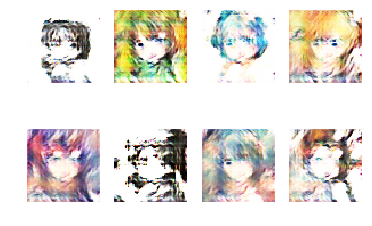

In [45]:
#Lets generate some random images
num_image = 8
for i in range(num_image):
    latent_z = mx.nd.random_normal(0, 1, shape=(1, latent_z_size, 1, 1), ctx=ctx)
    img = netG(latent_z)
    plt.subplot(2,4,i+1)
    visualize(img[0])
plt.show()

(64, 100, 1, 1)